In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import openpyxl

In [4]:
!pip install openpyxl

In [3]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
df = pd.read_csv(r"D:\Projeck\X_selected.csv")

# แสดง 5 แถวแรก
print(df.head())


   Showalter  Lifted   SWEAT     K  Cross  Vertical  TT Totals   CAPE    CIN  \
0      13.29   16.28  244.92 -27.1    5.7      19.7       25.4   0.00   0.00   
1      10.78   11.77  127.18 -22.1   10.3      19.3       29.6   0.00   0.00   
2       3.53    4.54  362.30 -14.3   19.3      19.7       39.0  15.68 -46.73   
3       4.66    5.24  200.40 -18.0   18.8      19.3       38.1   0.00 -50.25   
4       7.09    8.06  170.99  -0.7   15.3      18.3       33.6   0.00   0.00   

   LCL Temp   LCL P  LCL P.1   MML θ  MML q  Thickness   PWAT  dBZ  Month  Day  
0    276.14  783.20   314.16  296.13   6.16     5749.0  12.64  0.0      2    1  
1    281.45  839.90   319.96  295.87   8.30     5746.0  16.33  0.0      2    2  
2    288.03  903.90   331.01  296.49  11.91     5729.0  25.68  0.0      2    3  
3    285.99  879.04   327.88  296.74  10.71     5734.0  22.45  0.0      2    4  
4    285.51  868.80   327.84  297.24  10.51     5733.0  22.85  0.0      2    5  


In [6]:
import sys
!{sys.executable} -m pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
X = df.drop('Date', axis=1, errors='ignore')
y = df['dBZ']

In [5]:
X

,Showalter,Lifted,SWEAT,K,Cross,Vertical,TT Totals,CAPE,CIN,LCL Temp,LCL P,LCL P.1,MML θ,MML q,Thickness,PWAT,dBZ,Month,Day
0,13.29,16.28,244.92,-27.1,5.7,19.7,25.4,0.00,0.00,276.14,783.20,314.16,296.13,6.16,5749.0,12.64,0.0,2,1
1,10.78,11.77,127.18,-22.1,10.3,19.3,29.6,0.00,0.00,281.45,839.90,319.96,295.87,8.30,5746.0,16.33,0.0,2,2
2,3.53,4.54,362.30,-14.3,19.3,19.7,39.0,15.68,-46.73,288.03,903.90,331.01,296.49,11.91,5729.0,25.68,0.0,2,3
3,4.66,5.24,200.40,-18.0,18.8,19.3,38.1,0.00,-50.25,285.99,879.04,327.88,296.74,10.71,5734.0,22.45,0.0,2,4
4,7.09,8.06,170.99,-0.7,15.3,18.3,33.6,0.00,0.00,285.51,868.80,327.84,297.24,10.51,5733.0,22.85,0.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-4.55,-5.04,352.01,40.0,25.5,30.3,55.8,318.19,-95.93,289.19,896.00,336.27,298.43,13.00,5695.0,38.11,36.5,2,8
299,0.55,2.57,162.58,2.0,23.0,23.7,46.7,6.52,-108.75,284.68,877.22,324.07,295.55,9.87,5636.0,22.42,31.5,2,9
300,8.44,9.02,142.21,-4.7,13.7,19.7,33.4,0.00,0.00,284.29,880.49,322.46,294.84,9.55,5677.0,19.51,44.0,2,10
301,10.57,10.84,103.01,-18.9,10.1,20.1,30.2,0.00,0.00,283.37,871.98,320.92,294.70,9.08,5721.0,18.15,39.0,2,11


In [8]:
# แทนค่าที่เป็น '-' ด้วย NaN
df = df.replace('-', np.nan)

# แปลงคอลัมน์ตัวเลขทั้งหมดให้เป็น float (ถ้ามี string ค้างอยู่)
df = df.apply(pd.to_numeric, errors='ignore')

# ลบแถวที่มี NaN ออก
df = df.dropna()

C:\Users\HP\AppData\Local\Temp\ipykernel_22744\1168253027.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [10]:
# แยก X และ y ใหม่
X = df.drop('Date', axis=1, errors='ignore')
y = df['dBZ']

In [11]:
X

,Showalter,Lifted,SWEAT,K,Cross,Vertical,TT Totals,CAPE,CIN,BRN,LCL Temp,LCL P,LCL P.1,MML θ,MML q,Thickness,PWAT,dBZ
0,13.29,16.28,244.92,-27.1,5.7,19.7,25.4,0.00,0.00,0.00,276.14,783.20,314.16,296.13,6.16,5749.0,12.64,0.0
1,10.78,11.77,127.18,-22.1,10.3,19.3,29.6,0.00,0.00,0.00,281.45,839.90,319.96,295.87,8.30,5746.0,16.33,0.0
2,3.53,4.54,362.30,-14.3,19.3,19.7,39.0,15.68,-46.73,0.86,288.03,903.90,331.01,296.49,11.91,5729.0,25.68,0.0
3,4.66,5.24,200.40,-18.0,18.8,19.3,38.1,0.00,-50.25,0.00,285.99,879.04,327.88,296.74,10.71,5734.0,22.45,0.0
4,7.09,8.06,170.99,-0.7,15.3,18.3,33.6,0.00,0.00,0.00,285.51,868.80,327.84,297.24,10.51,5733.0,22.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,-4.55,-5.04,352.01,40.0,25.5,30.3,55.8,318.19,-95.93,3.38,289.19,896.00,336.27,298.43,13.00,5695.0,38.11,36.5
368,0.55,2.57,162.58,2.0,23.0,23.7,46.7,6.52,-108.75,0.17,284.68,877.22,324.07,295.55,9.87,5636.0,22.42,31.5
369,8.44,9.02,142.21,-4.7,13.7,19.7,33.4,0.00,0.00,0.00,284.29,880.49,322.46,294.84,9.55,5677.0,19.51,44.0
370,10.57,10.84,103.01,-18.9,10.1,20.1,30.2,0.00,0.00,0.00,283.37,871.98,320.92,294.70,9.08,5721.0,18.15,39.0


In [9]:
df.isna().sum()

Showalter    0
Lifted       0
SWEAT        0
K            0
Cross        0
Vertical     0
TT Totals    0
CAPE         0
CIN          0
LCL Temp     0
LCL P        0
LCL P.1      0
MML θ        0
MML q        0
Thickness    0
PWAT         0
dBZ          0
Month        0
Day          0
dtype: int64

In [12]:
# ----------------- ลบค่า '-' -----------------
df = df.replace('-', np.nan)
df = df.apply(pd.to_numeric, errors='ignore')
df = df.dropna()

# ----------------- แยก X, y -----------------
X = df.drop('Date', axis=1, errors='ignore')
y = df['dBZ']

# ----------------- คำนวณ Correlation -----------------
corr = X.corrwith(y)

# เลือกเก็บและตัดออก
selected_features = corr[abs(corr) >= 0.05].index.tolist()
removed_features = corr[abs(corr) < 0.05].index.tolist()

# ----------------- สร้าง X ใหม่ -----------------
X_selected = X[selected_features]

# ----------------- แสดงผล -----------------
print("✅ คอลัมน์ที่ถูกเก็บไว้ (Correlation >= 0.05):")
print(selected_features)

print("\n❌ คอลัมน์ที่ถูกตัดออก (Correlation < 0.05):")
print(removed_features)

✅ คอลัมน์ที่ถูกเก็บไว้ (Correlation >= 0.05):
['Showalter', 'Lifted', 'SWEAT', 'K', 'Cross', 'Vertical', 'TT Totals', 'CAPE', 'CIN', 'LCL Temp', 'LCL P', 'LCL P.1', 'MML θ', 'MML q', 'Thickness', 'PWAT', 'dBZ', 'Month', 'Day']

❌ คอลัมน์ที่ถูกตัดออก (Correlation < 0.05):
[]


C:\Users\HP\AppData\Local\Temp\ipykernel_22744\1289069560.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [13]:
# ----------------- แบ่ง train / test -----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_selected,  # ข้อมูล feature ที่เลือกแล้ว
    y,           # target (ค่าที่ต้องการทำนาย)
    test_size=0.2,       # สัดส่วน 20% สำหรับ test
    random_state=42      # ค่าคงที่เพื่อ reproducibility
)

# แสดงขนาดข้อมูลที่ถูกแบ่งแล้ว
print("\nขนาดข้อมูล:")
print("X_train:", X_train.shape)  # จำนวนแถว x คอลัมน์ของข้อมูล train
print("X_test:", X_test.shape)    # จำนวนแถว x คอลัมน์ของข้อมูล test
print("y_train:", y_train.shape)  # จำนวน target สำหรับ train
print("y_test:", y_test.shape)    # จำนวน target สำหรับ test



ขนาดข้อมูล:
X_train: (242, 19)
X_test: (61, 19)
y_train: (242,)
y_test: (61,)


In [14]:
# ----------------- 5. Scaling -----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)

X_train_scaled: (242, 19)
X_test_scaled: (61, 19)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

In [17]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 4.2 MB/s eta 0:00:14
   - -------------------------------------- 1.6/56.8 MB 4.4 MB/s eta 0:00:13
   - -------------------------------------- 2.6/56.8 MB 4.6 MB/s eta 0:00:12
   -- ------------------------------------- 3.7/56.8 MB 4.5 MB/s eta 0:00:12
   --- ------------------------------------ 4.7/56.8 MB 4.6 MB/s eta 0:00:12
   ---- ----------------------------------- 5.8/56.8 MB 4.5 MB/s eta 0:00:12
   ---- ----------------------------------- 6.6/56.8 MB 4.5 MB/s eta 0:00:12
   ----- ---------------------------------- 7.6/56.8 MB 4.5 MB/s eta 0:00:11
   ----- ---------------------------------- 8.4/56.8 MB 4.5 MB/s eta 0:00:11
   ------ --------------------------------- 9.2/56.8 MB 4.4 MB/s eta 0:00:11
   ------- -------------------------------- 10.0/56.8 MB 4.3 MB/s eta 0:00:11
   -


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
# ----------------- Linear Regression -----------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# ----------------- Random Forest -----------------
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)   # Random Forest ไม่จำเป็นต้อง scale
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# ----------------- XGBoost -----------------
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=200)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# ----------------- สรุปผล -----------------
print("===== Model Performance =====")
print(f"Linear Regression -> MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")
print(f"Random Forest     -> MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")
print(f"XGBoost           -> MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}, R2: {r2_xgb:.4f}")

===== Model Performance =====
Linear Regression -> MAE: 0.0000, RMSE: 0.0000, R2: 1.0000
Random Forest     -> MAE: 0.1407, RMSE: 0.3863, R2: 0.9996
XGBoost           -> MAE: 0.0924, RMSE: 0.2607, R2: 0.9998


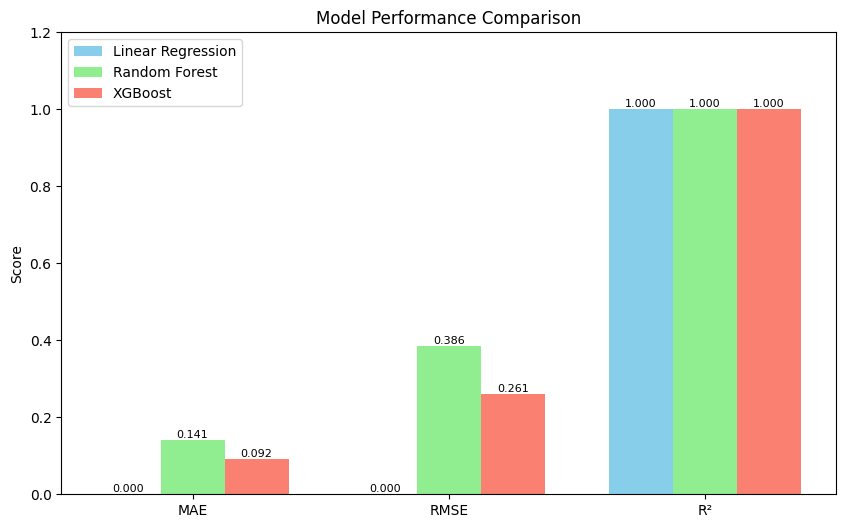

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# เก็บผลลัพธ์ใน dict
results = {
    "Linear Regression": [mae_lr, rmse_lr, r2_lr],
    "Random Forest": [mae_rf, rmse_rf, r2_rf],
    "XGBoost": [mae_xgb, rmse_xgb, r2_xgb]
}

metrics = ["MAE", "RMSE", "R²"]

# ----------------- สร้างกราฟ -----------------
x = np.arange(len(metrics))  # [0,1,2]
width = 0.25  # ความกว้างแท่ง

fig, ax = plt.subplots(figsize=(10,6))

# วาดแท่งสำหรับแต่ละโมเดล
ax.bar(x - width, results["Linear Regression"], width, label="Linear Regression", color="skyblue")
ax.bar(x, results["Random Forest"], width, label="Random Forest", color="lightgreen")
ax.bar(x + width, results["XGBoost"], width, label="XGBoost", color="salmon")

# ตกแต่งกราฟ
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# แสดงค่าเหนือแท่ง
for i, model in enumerate(results.keys()):
    for j, value in enumerate(results[model]):
        ax.text(j + (i-1)*width, value, f"{value:.3f}", ha="center", va="bottom", fontsize=8)

plt.ylim(0, max([max(v) for v in results.values()]) * 1.2)
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_overfit(model, X_train, y_train, X_test, y_test):
    # ----- Train -----
    y_train_pred = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    # ----- Test -----
    y_test_pred = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    print("===== Overfitting Check =====")
    print("Train Set : MAE={:.3f}, RMSE={:.3f}, R²={:.3f}".format(mae_train, rmse_train, r2_train))
    print("Test  Set : MAE={:.3f}, RMSE={:.3f}, R²={:.3f}".format(mae_test, rmse_test, r2_test))
    print("-" * 50)
    print("ค่าที่ต่างกันเยอะ → มีโอกาส Overfit")
    print()

    return {
        "Train": {"MAE": mae_train, "RMSE": rmse_train, "R2": r2_train},
        "Test": {"MAE": mae_test, "RMSE": rmse_test, "R2": r2_test}
    }

# 🔹 ใช้งานกับแต่ละโมเดล
evaluate_overfit(lr, X_train_scaled, y_train, X_test_scaled, y_test)   # Linear Regression
evaluate_overfit(rf, X_train, y_train, X_test, y_test)   # Random Forest
evaluate_overfit(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)  # XGBoost

===== Overfitting Check =====
Train Set : MAE=0.000, RMSE=0.000, R²=1.000
Test  Set : MAE=0.000, RMSE=0.000, R²=1.000
--------------------------------------------------
ค่าที่ต่างกันเยอะ → มีโอกาส Overfit

===== Overfitting Check =====
Train Set : MAE=0.077, RMSE=0.206, R²=1.000
Test  Set : MAE=0.141, RMSE=0.386, R²=1.000
--------------------------------------------------
ค่าที่ต่างกันเยอะ → มีโอกาส Overfit

===== Overfitting Check =====
Train Set : MAE=0.000, RMSE=0.001, R²=1.000
Test  Set : MAE=0.092, RMSE=0.261, R²=1.000
--------------------------------------------------
ค่าที่ต่างกันเยอะ → มีโอกาส Overfit



{'Train': {'MAE': 0.0004143788000405732,
  'RMSE': np.float64(0.0006280185113011832),
  'R2': 0.9999999988271157},
 'Test': {'MAE': 0.09241629068695102,
  'RMSE': np.float64(0.2607440380400037),
  'R2': 0.999832646240942}}

In [22]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,               # จำกัดความลึก
    min_samples_split=5,        # ต้องมีตัวอย่าง >=5 ถึงจะแยกได้
    min_samples_leaf=3,         # ใบต้องมี >=3 ตัวอย่าง
    max_features='sqrt',        # ใช้เฉพาะบาง feature
    random_state=42
)
rf.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,   # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    random_state=42
)

xgb_model.fit(
    X_train_scaled, y_train,
    verbose=False
)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [25]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# -----------------------------
# 1. Linear Regression (Ridge & Lasso)
# -----------------------------
ridge = Ridge(alpha=2.5)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# -----------------------------
# 2. Random Forest (tuned)
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# -----------------------------
# 3. XGBoost (tuned)
# -----------------------------
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,   # L1 regularization
    reg_lambda=1.0,  # L2 regularization
    random_state=42
)

xgb_model.fit(
    X_train_scaled, y_train,
    verbose=False
)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# -----------------------------
# ฟังก์ชันประเมินผล
# -----------------------------
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

print("\n=== ผลหลังแก้ Overfitting ===")
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


=== ผลหลังแก้ Overfitting ===
Ridge Regression -> MAE: 0.2076, RMSE: 0.2229, R2: 0.9999
Lasso Regression -> MAE: 0.5216, RMSE: 0.5518, R2: 0.9993
Random Forest -> MAE: 5.8666, RMSE: 7.3474, R2: 0.8671
XGBoost -> MAE: 1.2209, RMSE: 1.7357, R2: 0.9926


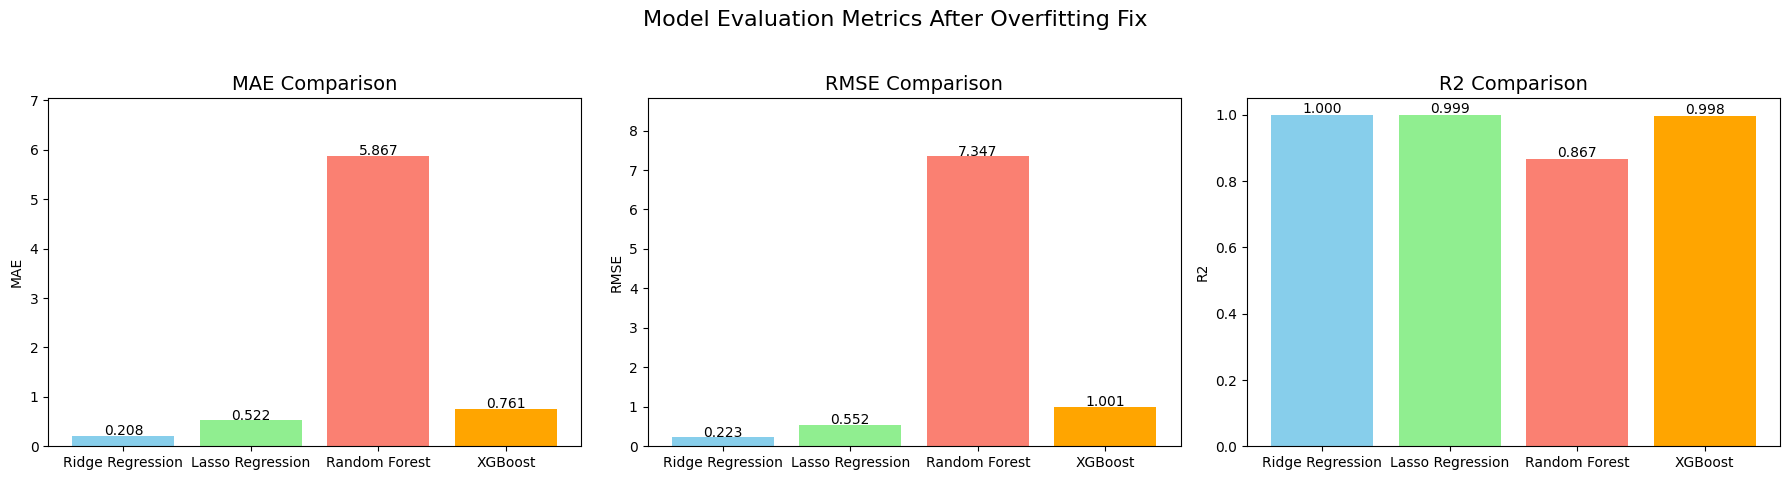

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# ผลลัพธ์หลังแก้ Overfitting
models = ["Ridge Regression", "Lasso Regression", "Random Forest", "XGBoost"]
mae_values = [0.2076, 0.5216, 5.8666, 0.7606]
rmse_values = [0.2229, 0.5518, 7.3474, 1.0013]
r2_values = [0.9999, 0.9993, 0.8671, 0.9975]

metrics = ["MAE", "RMSE", "R2"]
values = [mae_values, rmse_values, r2_values]
colors = ["skyblue", "lightgreen", "salmon", "orange"]

# สร้าง subplots 3 แถว 1 คอลัมน์ (เปรียบเทียบ metric แต่ละตัว)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ax in enumerate(axes):
    ax.bar(models, values[i], color=colors)
    ax.set_title(f"{metrics[i]} Comparison", fontsize=14)
    ax.set_ylabel(metrics[i])
    ax.set_ylim(0, max(values[i])*1.2 if metrics[i]!="R2" else 1.05)  # สำหรับ R2 ให้ไม่เกิน 1
    for j, v in enumerate(values[i]):
        ax.text(j, v + (0.02 if metrics[i]!="R2" else 0.005), f"{v:.3f}", ha='center', fontsize=10)

plt.suptitle("Model Evaluation Metrics After Overfitting Fix", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


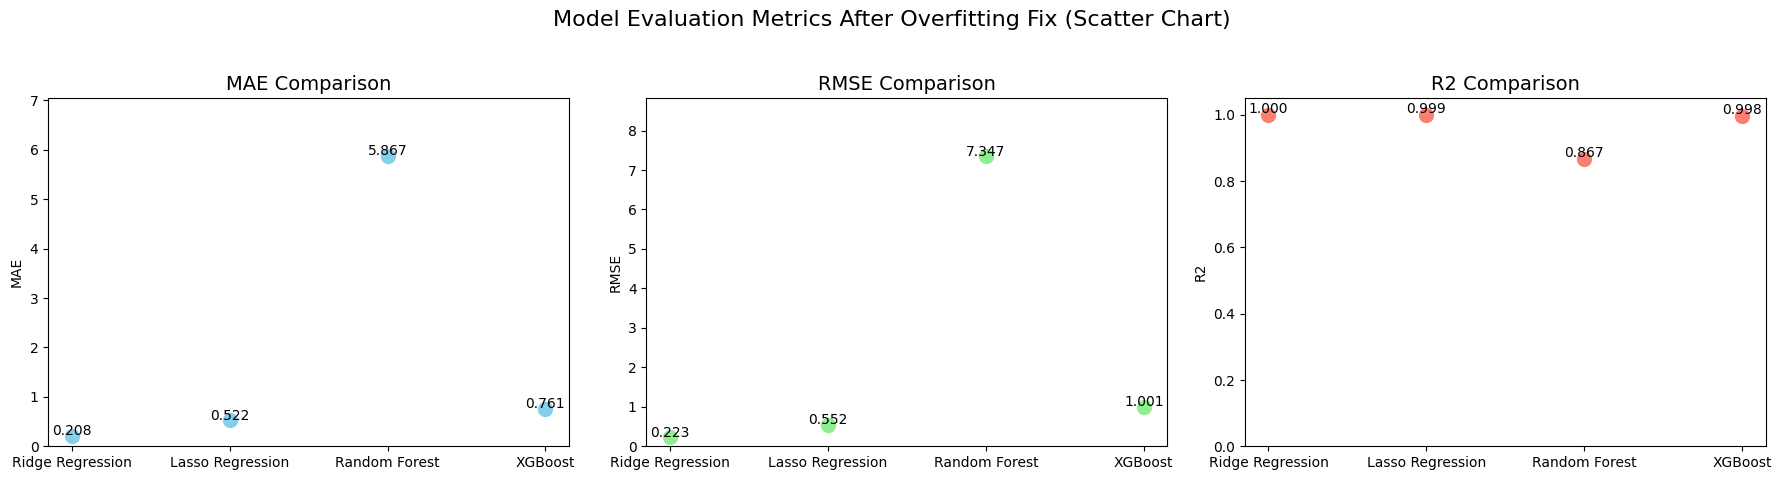

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# ผลลัพธ์หลังแก้ Overfitting
models = ["Ridge Regression", "Lasso Regression", "Random Forest", "XGBoost"]
mae_values = [0.2076, 0.5216, 5.8666, 0.7606]
rmse_values = [0.2229, 0.5518, 7.3474, 1.0013]
r2_values = [0.9999, 0.9993, 0.8671, 0.9975]

metrics_values = [mae_values, rmse_values, r2_values]
metrics_names = ["MAE", "RMSE", "R2"]
colors = ["skyblue", "lightgreen", "salmon"]

# สร้าง subplots 1 แถว 3 คอลัมน์
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ax in enumerate(axes):
    ax.scatter(models, metrics_values[i], color=colors[i], s=100, marker='o')  # ใช้ scatter
    ax.set_title(f"{metrics_names[i]} Comparison", fontsize=14)
    ax.set_ylabel(metrics_names[i])
    ax.set_ylim(0, max(metrics_values[i])*1.2 if metrics_names[i]!="R2" else 1.05)

    # แสดงค่าตัวเลขบนแต่ละจุด
    for j, v in enumerate(metrics_values[i]):
        ax.text(j, v + (0.02 if metrics_names[i]!="R2" else 0.005), f"{v:.3f}", ha='center', fontsize=10)

plt.suptitle("Model Evaluation Metrics After Overfitting Fix (Scatter Chart)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


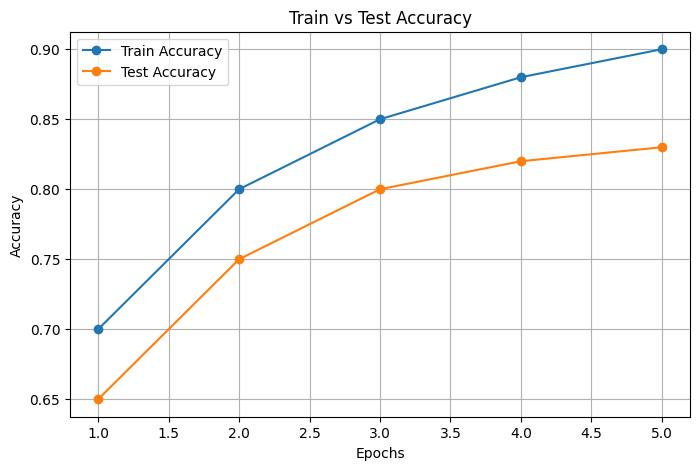

In [20]:
import matplotlib.pyplot as plt

# ตัวอย่างค่า accuracy (คุณเปลี่ยนเป็นค่าของคุณเอง)
train_accuracy = [0.7, 0.8, 0.85, 0.88, 0.9]
test_accuracy = [0.65, 0.75, 0.8, 0.82, 0.83]
epochs = [1, 2, 3, 4, 5]

plt.figure(figsize=(8,5))
plt.plot(epochs, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(epochs, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
import matplotlib.pyplot as plt

# สมมติว่า history เก็บค่า training history
# history.history['loss'], history.history['val_loss'], history.history['accuracy'], history.history['val_accuracy']

epochs = range(1, len(y_train_pred['loss']) + 1)

# ---- Loss ----
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)

# ---- Accuracy ----
plt.subplot(1,2,2)
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True)

plt.show()


NameError: name 'y_train_pred' is not defined

In [49]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']